# OSOS AI Technical Test – RAG System using Local LLaMA + Embedding + VectorDB (FAISS)

# ================================================================
#  Cell 1: Install Required Packages
# ================================================================

In [ ]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# ================================================================
# Cell 2: Run the tokenizer to Create the (cl100k_base) tokens
# ================================================================

In [3]:
import tiktoken

tokenizer = tiktoken.get_encoding("cl100k_base")

def chunk_text_with_overlap(text, chunk_size=512, overlap=50):
    tokens = tokenizer.encode(text)
    chunks = []
    for i in range(0, len(tokens), chunk_size - overlap):
        chunk = tokens[i:i + chunk_size]
        chunks.append(tokenizer.decode(chunk))
    return chunks



# ================================================================
# Cell 3: Extract and Chunck the Text
# ================================================================

In [39]:
import os
import fitz  # PyMuPDF
import docx
import pandas as pd
import time
import warnings
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the specific warning from openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.worksheet.header_footer")

extraction_stats = []

def extract_text_from_docx(path):
    doc = docx.Document(path)
    return '\n'.join([p.text for p in doc.paragraphs])

def extract_text_from_pdf(path):
    doc = fitz.open(path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

def extract_text_from_excel(path):
    dfs = pd.read_excel(path, sheet_name=None)
    return '\n'.join(df.to_string(index=False) for df in dfs.values())

def extract_text_from_csv(path):
    df = pd.read_csv(path)
    return df.to_string(index=False)

def extract_text(path):
    if path.endswith('.docx'):
        return extract_text_from_docx(path)
    elif path.endswith('.pdf'):
        return extract_text_from_pdf(path)
    elif path.endswith('.csv'):
        return extract_text_from_csv(path)
    elif path.endswith(('.xlsx', '.xls', '.xlsm')):
        return extract_text_from_excel(path)
    else:
        return ""

def chunk_text_with_overlap(text, chunk_size=512, overlap=128):
    """
    Splits the text into chunks with a specified overlap.
    """
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunk = text[start:end]
        chunks.append(chunk)
        start += chunk_size - overlap
    return chunks

def load_and_chunk_all_files(folder_path, chunk_size=512):
    all_chunks = []
    metadata = []
    total_start_time = time.time()  # Start time for entire process

    print(f"📁 Starting processing of files in folder: {folder_path}")
    print(f"{'='*50}")

    for filename in os.listdir(folder_path):
        full_path = os.path.join(folder_path, filename)
        if os.path.isfile(full_path):
            print(f"\n📄 Processing file: {filename}")
            try:
                start_time = time.time()
                text = extract_text(full_path)
                chunks = chunk_text_with_overlap(text, chunk_size=chunk_size)
                end_time = time.time()
                extraction_time = round(end_time - start_time, 2)

                print(f"✔️ Successfully extracted text from {filename}")
                print(f"⏱️ Extraction time: {extraction_time} seconds")
                print(f"📑 Number of chunks created: {len(chunks)}")

                for i, chunk in enumerate(chunks):
                    all_chunks.append(chunk)
                    metadata.append({
                        "source": filename,
                        "chunk_number": i + 1,
                        "text": chunk
                    })

                extraction_stats.append({
                    "filename": filename,
                    "chunks": len(chunks),
                    "time_taken_sec": extraction_time
                })

            except Exception as e:
                print(f"❌ Error reading {filename}: {e}")

    total_end_time = time.time()
    total_time = round(total_end_time - total_start_time, 2)

    print(f"\n{'='*50}")
    print(f"🏁 All files processed!")
    print(f"📊 Total number of chunks: {len(all_chunks)}")
    print(f"⏱️ Total processing time: {total_time} seconds")
    print(f"📈 Extraction stats recorded for {len(extraction_stats)} files")

    return all_chunks, metadata

# Example call
chunks, metadata = load_and_chunk_all_files("Dr.X")


📁 Starting processing of files in folder: Dr.X

📄 Processing file: Dataset summaries and citations.docx
✔️ Successfully extracted text from Dataset summaries and citations.docx
⏱️ Extraction time: 0.01 seconds
📑 Number of chunks created: 14

📄 Processing file: Loan amortisation schedule1.xlsx
✔️ Successfully extracted text from Loan amortisation schedule1.xlsx
⏱️ Extraction time: 0.02 seconds
📑 Number of chunks created: 13

📄 Processing file: Loan analysis.xlsx
✔️ Successfully extracted text from Loan analysis.xlsx
⏱️ Extraction time: 0.02 seconds
📑 Number of chunks created: 37

📄 Processing file: M.Sc. Applied Psychology.docx
✔️ Successfully extracted text from M.Sc. Applied Psychology.docx
⏱️ Extraction time: 0.08 seconds
📑 Number of chunks created: 287

📄 Processing file: new-approaches-and-procedures-for-cancer-treatment.pdf
✔️ Successfully extracted text from new-approaches-and-procedures-for-cancer-treatment.pdf
⏱️ Extraction time: 0.02 seconds
📑 Number of chunks created: 127

📄 

c:\mystuff\drx_project\venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


✔️ Successfully extracted text from Ocean_ecogeochemistry_A_review.pdf
⏱️ Extraction time: 0.11 seconds
📑 Number of chunks created: 498

📄 Processing file: party budget1.xlsx
✔️ Successfully extracted text from party budget1.xlsx
⏱️ Extraction time: 0.03 seconds
📑 Number of chunks created: 47

📄 Processing file: Stats.docx
✔️ Successfully extracted text from Stats.docx
⏱️ Extraction time: 0.01 seconds
📑 Number of chunks created: 20

📄 Processing file: The-Alchemist.pdf
✔️ Successfully extracted text from The-Alchemist.pdf
⏱️ Extraction time: 0.08 seconds
📑 Number of chunks created: 600

📄 Processing file: The_Plan_of_the_Giza_Pyramids.pdf
✔️ Successfully extracted text from The_Plan_of_the_Giza_Pyramids.pdf
⏱️ Extraction time: 0.03 seconds
📑 Number of chunks created: 100

🏁 All files processed!
📊 Total number of chunks: 1743
⏱️ Total processing time: 0.43 seconds
📈 Extraction stats recorded for 10 files


c:\mystuff\drx_project\venv\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Wedding budget'!$A:$K.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


# ================================================================
# Cell 4: Embedding using nomic-embed-text-v2 / all-MiniLM-L6-v2
# ================================================================

In [29]:

from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

def get_embedding(text):
    return embedder.encode(text)

# ================================================================
# Cell 5: FAISS Vector DB Setup
# ================================================================

In [9]:

import faiss
import numpy as np

def create_faiss_index(chunks):
    vectors = [get_embedding(chunk) for chunk in chunks]
    index = faiss.IndexFlatL2(len(vectors[0]))
    index.add(np.array(vectors))
    return index, vectors

index, vectors = create_faiss_index(chunks)


# ================================================================
# Cell 6: Load Local LLaMA GGUF Model
# ================================================================

In [10]:
from llama_cpp import Llama

llm = Llama(
    model_path="C:/mystuff/Project1/Llama-3.2-1B-Instruct-Q4_K_M-GGUF/llama-3.2-1b-instruct-q4_k_m.gguf",
    n_gpu_layers=35,
    n_ctx=2048,
    n_threads=8,
    n_batch=512,
    f16_kv=True,
    verbose=True
)

def generate_answer(prompt):
    start = time.time()
    output = llm(
        prompt=prompt,
        max_tokens=512,
        stop=["</s>"],
        echo=False,
        temperature=0.0,
        top_p=1.0,
        top_k=1,
        repeat_penalty=1.2
    )
    end = time.time()
    print(f"⚡ Answer generated in {end - start:.2f} sec")
    return output['choices'][0]['text'].strip()


llama_model_loader: loaded meta data with 30 key-value pairs and 147 tensors from C:/mystuff/Project1/Llama-3.2-1B-Instruct-Q4_K_M-GGUF/llama-3.2-1b-instruct-q4_k_m.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama 3.2 1B Instruct
llama_model_loader: - kv   3:                           general.finetune str              = Instruct
llama_model_loader: - kv   4:                           general.basename str              = Llama-3.2
llama_model_loader: - kv   5:                         general.size_label str              = 1B
llama_model_loader: - kv   6:                               general.tags arr[str,6]       = ["fac

# ================================================================
# Cell 7: Load Translation Models ( English + Arabic )
# ================================================================

In [31]:

from transformers import pipeline

try:
    import sentencepiece  # Ensure sentencepiece is installed
except ImportError:
    raise ImportError("❌ sentencepiece is not installed. Please run: !pip install sentencepiece")

from langdetect import detect

# English and Arabic translation models
translator_en = pipeline("translation", model="Helsinki-NLP/opus-mt-mul-en")
translator_ar = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ar")  # Valid model for English to Arabic

def translate_text_auto(text, target_lang="en"):
    src_lang = detect(text)
    if src_lang == target_lang:
        return text
    try:
        if target_lang == "ar":
            return translator_ar(text)[0]['translation_text']
        return translator_en(text)[0]['translation_text']
    except Exception as e:
        print(f"❌ Translation failed: {e}")
        return text

# Example usage

# translate_text_auto("Bonjour, je suis Dr. X.", target_lang="en")

translate_text_auto("My name is Mustafa, I am from pakistan.", target_lang="ar")



c:\mystuff\drx_project\venv\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu
Device set to use cpu


'اسمي (مصطفى) وأنا من (باكستان)'

# ================================================================
# Cell 8: RAG QA System ( Single Question )
# ================================================================

In [24]:
import re

def normalize_query(text):
    text = text.lower()
    text = re.sub(r"dr[\.\s]*x", "drx", text)
    return text

def rag_answer(query, chunks, index, metadata=None, max_tokens=1500, translate_to=None):
    query = normalize_query(query)
    query_vec = np.array([get_embedding(query)])
    _, I = index.search(query_vec, k=5)

    context_parts = []
    total_tokens = 0
    references = []

    for i in I[0]:
        chunk = chunks[i]
        tokens = tokenizer.encode(chunk)
        if total_tokens + len(tokens) > max_tokens:
            break
        context_parts.append(chunk)
        total_tokens += len(tokens)
        if metadata:
            references.append(f"📄 {metadata[i]['source']} | Chunk {metadata[i]['chunk_number']}")

    context = "\n\n".join(context_parts)
    refs = "\n".join(references)

    prompt = f"""You are a helpful assistant. Answer the question based on context.\n\nContext:\n{context}\n\nQuestion: {query}\nAnswer:"""

    answer = generate_answer(prompt)
    if translate_to:
        answer = translate_text_auto(answer, target_lang=translate_to)

    return answer + ("\n\n🔗 References:\n" + refs if references else "")


rag_answer("Tell me about Dr. X's contribution?", chunks, index, metadata=metadata, translate_to="ar")



Llama.generate: 16 prefix-match hit, remaining 1007 prompt tokens to eval
llama_perf_context_print:        load time =    8374.03 ms
llama_perf_context_print: prompt eval time =    7881.11 ms /  1007 tokens (    7.83 ms per token,   127.77 tokens per second)
llama_perf_context_print:        eval time =    6222.13 ms /   270 runs   (   23.04 ms per token,    43.39 tokens per second)
llama_perf_context_print:       total time =   14675.75 ms /  1277 tokens


⚡ Answer generated in 14.68 sec


'هي عبارة عن نوع من أجهزة الاستقبال الصوتي التي طورها العالم الأمريكي روبرت دي هيمان وزملاؤه في الستينات من القرن الماضي. ويرمز دكس إلى "Deep-Sea Asociative commer" أو يشير بشكل أكثر تحديداً إلى جهاز صوتي يستخدم في المقام الأول سفن البحوث، وهو مصمم بأجهزة استقبال متعددة موضوعة على سطحه وقادرة على كشف مختلف أنواع الأصوات من البيئة المحيطة، بما في ذلك تلك التي تنتجها الحياة البحرية والأنشطة البشرية مثل حركة السفن، وتتمثل المساهمة الرئيسية للدركس في أنها تستطيع أن تكتشف نطاقاً واسعاً من الترددات (من صفر إلى أكثر من 100 كيلوهرتز) في الوقت الحقيقي، مما يجعلها مفيدة جداً في رصد تيارات المحيطات، ودراسة النظم الإيكولوجية البحرية، وتعقب المركبات أو السفن الموجودة تحت سطح الماء، والكشف عن النشاط الاهتزازي وما إلى ذلك، وكل ذلك من راحة وسلامة سفينة بحثية تحت سطح الماء. وقد استخدم دركس على نطاق واسع من جانب باحثين مختلفين في جميع أنحاء العالم، بما في ذلك الباحثين الذين يعملون في مشاريع تتصل بدراسات تغير المناخ، وجهود حفظ الحياة البحرية، وحتى في بعض الحالات لرصد تلوث المحيطات. ويجري استكشاف الجهاز أ

# ================================================================
# Cell 9: RAG QA System ( Continous Chat )
# ================================================================

In [12]:
import re
import numpy as np

def normalize_query(text):
    text = text.lower()
    text = re.sub(r"dr[\.\s]*x", "drx", text)
    return text

def rag_answer(query, chunks, index, metadata=None, max_tokens=1500):
    query = normalize_query(query)
    query_vec = np.array([get_embedding(query)])
    _, I = index.search(query_vec, k=5)

    context_parts = []
    total_tokens = 0
    references = []

    for i in I[0]:
        chunk = chunks[i]
        tokens = tokenizer.encode(chunk)
        if total_tokens + len(tokens) > max_tokens:
            break
        context_parts.append(chunk)
        total_tokens += len(tokens)
        if metadata:
            references.append(f"📄 {metadata[i]['source']} | Chunk {metadata[i]['chunk_number']}")

    context = "\n\n".join(context_parts)
    refs = "\n".join(references)

    prompt = f"""You are a helpful assistant. Answer the question based on context.\n\nContext:\n{context}\n\nQuestion: {query}\nAnswer:"""

    answer = generate_answer(prompt)
    return answer + ("\n\n🔗 References:\n" + refs if references else "")

def run_chat_interface(chunks, index, metadata=None):
    """
    Run a continuous chat interface where users can ask questions until they press 'q' to exit.
    """
    print("\n=== Dr. X Research RAG Chat System ===")
    print("Ask questions about Dr. X's research. Type 'q' and press Enter to exit.")
    print("="*40)
    
    while True:
        # Get user query
        query = input("\nYour question (q to exit): ")
        
        # Check if user wants to exit
        if query.lower() == 'q':
            print("\nExiting chat. Thank you for using the Dr. X Research RAG system!")
            break
        
        # Process empty input
        if not query.strip():
            print("Please enter a question or 'q' to exit.")
            continue
        
        # Get answer using RAG system
        try:
            answer = rag_answer(query, chunks, index, metadata=metadata)
            print("\n" + answer)
        except Exception as e:
            print(f"\nAn error occurred: {str(e)}")
            print("Please try a different question.")



# rag_answer("What is the main topic of Dr. X Research ?", chunks, index, metadata=metadata) 

run_chat_interface(chunks, index, metadata=metadata)



=== Dr. X Research RAG Chat System ===
Ask questions about Dr. X's research. Type 'q' and press Enter to exit.

Exiting chat. Thank you for using the Dr. X Research RAG system!


# ================================================================
# Cell 9: Summarization
# ================================================================

In [36]:
from transformers import pipeline
import tiktoken
import logging
import os
import re

# Set up logging
logging.basicConfig(filename="outputs/summarization.log", level=logging.INFO)

summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)  # CPU for offline

def chunk_text_for_summarization(text, max_tokens=1000, tokenizer_encoding="cl100k_base"):
    """
    Split text into chunks suitable for BART's input limit (~1024 tokens).
    """
    tokenizer = tiktoken.get_encoding(tokenizer_encoding)
    tokens = tokenizer.encode(text)
    chunks = []
    current_chunk = []
    current_count = 0

    for token in tokens:
        current_chunk.append(token)
        current_count += 1
        if current_count >= max_tokens:
            chunks.append(tokenizer.decode(current_chunk))
            current_chunk = []
            current_count = 0
    if current_chunk:
        chunks.append(tokenizer.decode(current_chunk))
    
    return chunks

def filter_relevant_chunks(chunks, metadata, drx_pattern=r"\bDr\.\s*X\b"):
    """
    Filter chunks likely related to Dr. X based on content or metadata.
    """
    relevant_chunks = []
    for i, chunk in enumerate(chunks):
        # Get filename from metadata (assuming metadata[i]["filename"] exists)
        filename = metadata[i].get("filename", "unknown") if i < len(metadata) else "unknown"
        
        # Skip chunks from irrelevant files (e.g., The-Alchemist.pdf)
        if any(exclude in filename.lower() for exclude in ["alchemist", "loan analysis"]):
            logging.info(f"Skipping chunk {i+1} from {filename}: likely irrelevant")
            continue
        
        # Check for Dr. X mentions or scientific content
        if re.search(drx_pattern, chunk, re.IGNORECASE) or "research" in chunk.lower():
            relevant_chunks.append(chunk)
            logging.info(f"Including chunk {i+1} from {filename}: Dr. X or research-related")
        else:
            logging.info(f"Skipping chunk {i+1} from {filename}: no Dr. X or research content")
    
    return relevant_chunks

def summarize_text(chunks, metadata, max_length=150, min_length=30):
    """
    Summarize filtered chunks into a single coherent summary focused on Dr. X.
    """
    try:
        # Filter chunks relevant to Dr. X
        relevant_chunks = filter_relevant_chunks(chunks, metadata)
        if not relevant_chunks:
            logging.warning("No relevant chunks found for summarization.")
            return "No Dr. X-related content available for summarization."

        # Concatenate relevant chunks
        full_text = "\n".join(relevant_chunks)
        if not full_text.strip():
            logging.warning("Filtered text is empty.")
            return "No valid text after filtering for Dr. X."

        # Chunk text to fit BART's limit
        text_chunks = chunk_text_for_summarization(full_text, max_tokens=1000)
        summaries = []

        for i, chunk in enumerate(text_chunks):
            logging.info(f"Summarizing chunk {i+1}/{len(text_chunks)}")
            try:
                summary = summarizer(
                    chunk,
                    max_length=max_length,
                    min_length=min_length,
                    do_sample=False,
                    truncation=True
                )[0]['summary_text']
                # Prepend "Dr. X" to sentences where relevant
                summary = re.sub(r"^(.*research.*|.*discover.*|.*publish.*)", r"Dr. X \1", summary, flags=re.IGNORECASE)
                summaries.append(summary)
            except Exception as e:
                logging.error(f"Error summarizing chunk {i+1}: {str(e)}")
                summaries.append("")

        # Combine summaries, prioritizing Dr. X mentions
        combined_summary = " ".join([s for s in summaries if s])
        if not combined_summary:
            return "Failed to generate Dr. X summary."

        # Clean up and emphasize Dr. X
        combined_summary = re.sub(r"\s+", " ", combined_summary).strip()
        if not "Dr. X" in combined_summary:
            combined_summary = f"Dr. X contributed to: {combined_summary}"

        # Save summary to file
        os.makedirs("outputs", exist_ok=True)
        with open("outputs/summary.txt", "w", encoding="utf-8") as f:
            f.write(combined_summary)
        logging.info("Summary saved to outputs/summary.txt")

        return combined_summary

    except Exception as e:
        logging.error(f"Summarization error: {str(e)}")
        return f"Error during summarization: {str(e)}"

# Run summarization
summary = summarize_text(chunks, metadata)
print("Summary of Dr. X's Documents:\n", summary)

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Summary of Dr. X's Documents:
 Dr. X contributed to: Soil carbon sequestration in bermudagrass golf course fairways in Lubbock, Texas. Soil carbon and nitrogen accumulation in residential lawns of the Salt Lake Valley. Global cancer statistics 2020: GLOBOCAN estimates of incidence and mortality for 36 cancers in 185 countries. Global variation in postoperative mortality and complications after cancer surgery: a multicentre, prospective cohort study in 82 countries. Otoliths preserve a chronological record of a ish’s metabolic activity and the physical and chemical characteristics of the water in which the ish resided during the time of deposition. Isotope turnover rates tend to be strongly correlated with growth rate and accretion of biomass in teleost ishes. Seascape coniguration played a critical but heretofore- unrecognized role in determining connectivity among habitats. Phenomenon: The distribution of bomb radiocarbon in the ocean. Otolith chemistry analyses indicate that water Sr

# ================================================================
# Cell 10: Visualization of Stats      [ BONUS ]
# ================================================================

Batches: 100%|██████████| 1/1 [00:00<00:00, 97.10it/s]
Llama.generate: 512 prefix-match hit, remaining 510 prompt tokens to eval
llama_perf_context_print:        load time =    8374.03 ms
llama_perf_context_print: prompt eval time =    4666.60 ms /   510 tokens (    9.15 ms per token,   109.29 tokens per second)
llama_perf_context_print:        eval time =     533.81 ms /    21 runs   (   25.42 ms per token,    39.34 tokens per second)
llama_perf_context_print:       total time =    5239.16 ms /   531 tokens


⚡ Answer generated in 5.24 sec


Batches: 100%|██████████| 1/1 [00:00<00:00, 88.88it/s]
Llama.generate: 16 prefix-match hit, remaining 1037 prompt tokens to eval
llama_perf_context_print:        load time =    8374.03 ms
llama_perf_context_print: prompt eval time =    8996.33 ms /  1037 tokens (    8.68 ms per token,   115.27 tokens per second)
llama_perf_context_print:        eval time =    9885.56 ms /   395 runs   (   25.03 ms per token,    39.96 tokens per second)
llama_perf_context_print:       total time =   19819.52 ms /  1432 tokens


⚡ Answer generated in 19.83 sec


Batches: 100%|██████████| 1/1 [00:00<00:00, 97.14it/s]
Llama.generate: 16 prefix-match hit, remaining 1020 prompt tokens to eval
llama_perf_context_print:        load time =    8374.03 ms
llama_perf_context_print: prompt eval time =    8270.30 ms /  1020 tokens (    8.11 ms per token,   123.33 tokens per second)
llama_perf_context_print:        eval time =   12130.17 ms /   511 runs   (   23.74 ms per token,    42.13 tokens per second)
llama_perf_context_print:       total time =   21670.75 ms /  1531 tokens
Your input_length: 531 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


⚡ Answer generated in 21.67 sec
❌ Translation failed: index out of range in self


Batches: 100%|██████████| 1/1 [00:00<00:00, 39.36it/s]
Llama.generate: 512 prefix-match hit, remaining 523 prompt tokens to eval
llama_perf_context_print:        load time =    8374.03 ms
llama_perf_context_print: prompt eval time =    4561.06 ms /   523 tokens (    8.72 ms per token,   114.67 tokens per second)
llama_perf_context_print:        eval time =   12487.37 ms /   511 runs   (   24.44 ms per token,    40.92 tokens per second)
llama_perf_context_print:       total time =   18249.38 ms /  1034 tokens
Your input_length: 556 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 546 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 509 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


⚡ Answer generated in 18.25 sec
❌ Translation failed: index out of range in self
❌ Translation failed: index out of range in self


Your input_length: 529 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 481 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


❌ Translation failed: index out of range in self


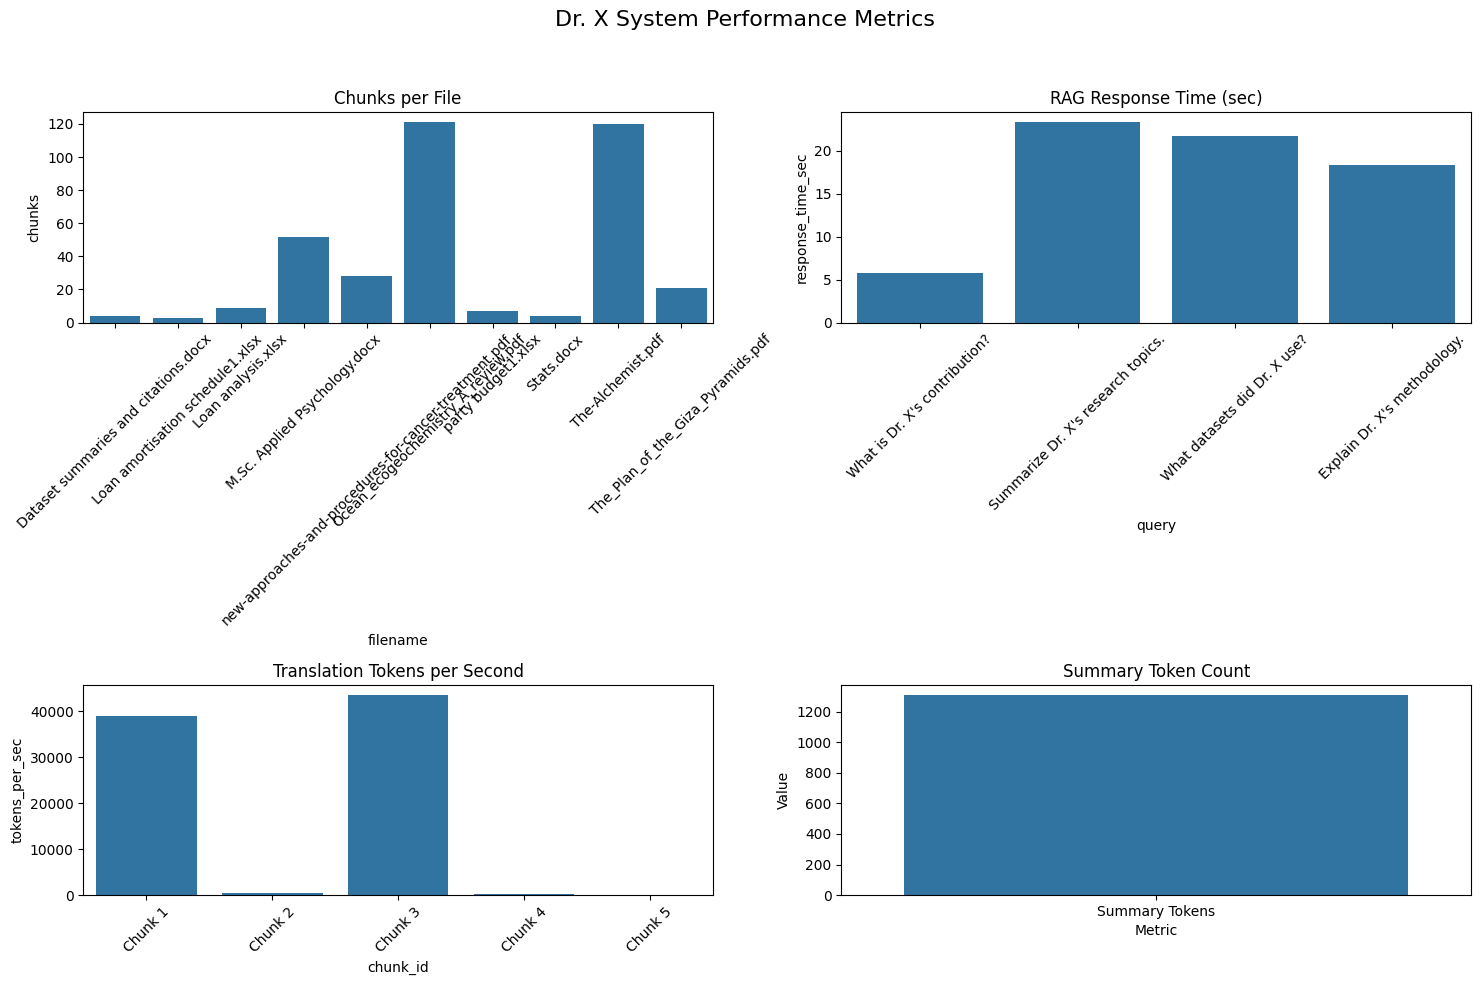

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from langdetect import detect, DetectorFactory
import tiktoken
import re
import logging

# Ensure consistent language detection
DetectorFactory.seed = 0

# Set up logging
logging.basicConfig(filename="outputs/visualization.log", level=logging.INFO)

def clean_text(text):
    """
    Clean text to remove problematic characters and excessive whitespace.
    """
    if not text:
        return ""
    # Remove non-printable characters and normalize whitespace
    text = re.sub(r'[^\x20-\x7E\n\t]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def truncate_text(text, max_tokens=500, tokenizer_encoding="cl100k_base"):
    """
    Truncate text to fit within token limit.
    """
    tokenizer = tiktoken.get_encoding(tokenizer_encoding)
    tokens = tokenizer.encode(text)
    if len(tokens) > max_tokens:
        tokens = tokens[:max_tokens]
        text = tokenizer.decode(tokens)
    return text

def measure_rag_performance(chunks, index, metadata, queries, translate_to=None):
    """
    Measure RAG response time and token count for sample queries.
    """
    tokenizer = tiktoken.get_encoding("cl100k_base")
    performance = []
    
    for query in queries:
        try:
            start_time = time.time()
            answer = rag_answer(query, chunks, index, metadata=metadata, translate_to=translate_to)
            end_time = time.time()
            tokens = len(tokenizer.encode(answer))
            performance.append({
                "query": query[:50],  # Truncate for plotting
                "response_time_sec": end_time - start_time,
                "answer_tokens": tokens
            })
            logging.info(f"RAG query '{query[:50]}' processed in {end_time - start_time:.2f} sec")
        except Exception as e:
            logging.error(f"RAG query '{query[:50]}' failed: {str(e)}")
    
    return performance

def measure_translation_performance(chunks, target_lang="ar"):
    """
    Measure translation tokens per second using translate_text_auto.
    """
    tokenizer = tiktoken.get_encoding("cl100k_base")
    performance = []
    sample_chunks = chunks[:5]  # Limit to 5 chunks for speed
    
    for i, chunk in enumerate(sample_chunks):
        chunk = clean_text(chunk)
        if not chunk.strip():
            logging.warning(f"Chunk {i+1} is empty after cleaning, skipping")
            continue
        
        # Truncate to avoid model input limits
        chunk = truncate_text(chunk, max_tokens=500)
        
        try:
            start_time = time.time()
            translated = translate_text_auto(chunk, target_lang=target_lang)
            end_time = time.time()
            tokens = len(tokenizer.encode(chunk))
            elapsed = end_time - start_time
            tokens_per_sec = tokens / elapsed if elapsed > 0 else 0
            performance.append({
                "chunk_id": f"Chunk {i+1}",
                "tokens_per_sec": tokens_per_sec,
                "tokens": tokens
            })
            logging.info(f"Translation chunk {i+1} processed: {tokens_per_sec:.2f} tokens/sec")
        except Exception as e:
            logging.error(f"Translation chunk {i+1} failed: {str(e)}")
            continue
    
    return performance

def plot_system_performance(extraction_stats, rag_performance, translation_performance, summary_text):
    """
    Visualize RAG, translation, extraction, and summary metrics.
    """
    # Convert to DataFrames
    extract_df = pd.DataFrame(extraction_stats)
    rag_df = pd.DataFrame(rag_performance)
    trans_df = pd.DataFrame(translation_performance)
    
    # Create a 2x2 subplot layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle("Dr. X System Performance Metrics", fontsize=16)
    
    # 1. Extraction: Chunks per File
    if not extract_df.empty:
        sns.barplot(data=extract_df, x="filename", y="chunks", ax=axes[0, 0])
        axes[0, 0].set_title("Chunks per File")
        axes[0, 0].tick_params(axis='x', rotation=45)
    else:
        axes[0, 0].text(0.5, 0.5, "No extraction data", ha='center', va='center')
        axes[0, 0].set_title("Chunks per File")
    
    # 2. RAG: Response Time per Query
    if not rag_df.empty:
        sns.barplot(data=rag_df, x="query", y="response_time_sec", ax=axes[0, 1])
        axes[0, 1].set_title("RAG Response Time (sec)")
        axes[0, 1].tick_params(axis='x', rotation=45)
    else:
        axes[0, 1].text(0.5, 0.5, "No RAG data", ha='center', va='center')
        axes[0, 1].set_title("RAG Response Time (sec)")
    
    # 3. Translation: Tokens per Second
    if not trans_df.empty:
        sns.barplot(data=trans_df, x="chunk_id", y="tokens_per_sec", ax=axes[1, 0])
        axes[1, 0].set_title("Translation Tokens per Second")
        axes[1, 0].tick_params(axis='x', rotation=45)
    else:
        axes[1, 0].text(0.5, 0.5, "No translation data", ha='center', va='center')
        axes[1, 0].set_title("Translation Tokens per Second")
    
    # 4. Summary: Token Count
    tokenizer = tiktoken.get_encoding("cl100k_base")
    summary_tokens = len(tokenizer.encode(summary_text)) if summary_text else 0
    summary_df = pd.DataFrame({"Metric": ["Summary Tokens"], "Value": [summary_tokens]})
    sns.barplot(data=summary_df, x="Metric", y="Value", ax=axes[1, 1])
    axes[1, 1].set_title("Summary Token Count")
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("outputs/performance_plots.png")
    plt.show()
    logging.info("Plots saved to outputs/performance_plots.png")

# Sample queries for RAG performance
sample_queries = [
    "What is Dr. X's contribution?",
    "Summarize Dr. X's research topics.",
    "What datasets did Dr. X use?",
    "Explain Dr. X's methodology."
]

# Measure performance
logging.info("Starting RAG performance measurement")
rag_performance = measure_rag_performance(chunks, index, metadata, sample_queries, translate_to="ar")
logging.info("Starting translation performance measurement")
translation_performance = measure_translation_performance(chunks, target_lang="ar")

# Plot results
plot_system_performance(extraction_stats, rag_performance, translation_performance, summary)

In [ ]:










# ================================================================
# 📤 Cell 10: GitHub Upload Instructions (Markdown)
# ================================================================
"""
## 📤 GitHub Upload Instructions

1. Go to https://github.com and create a new repository.
2. In VS Code terminal, navigate to your project folder.
3. Run these commands:

```bash
git init
git add .
git commit -m "Initial commit"
git branch -M main
git remote add origin https://github.com/your-username/your-repo.git
git push -u origin main
```

4. Attach the GitHub link in your assignment reply.
"""
